In [1]:
# Import libraries

import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import numpy as np
import pandas as pd
import os
import statsmodels.api
from sklearn.model_selection  import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
%matplotlib inline
from sklearn import model_selection
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV
sns.set()

In [2]:
# Reading data
music_df = pd.read_csv("data.csv")

In [3]:
# Removing the filename column
music_df = music_df.drop(["filename"], axis = 1)

In [4]:
# Define target and data variables
target = music_df.label
data = music_df.drop('label',axis=1)

In [5]:
# Function to remove highly correlated columns

def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

In [6]:
# Removing the columns 

correlation(data, 0.85)
print(data.columns)

Index(['tempo', 'chroma_stft', 'rmse', 'spectral_centroid', 'mfcc1', 'mfcc2',
       'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10',
       'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17',
       'mfcc18', 'mfcc19', 'mfcc20'],
      dtype='object')


In [7]:
# Encode the label classes using LabelEncoder
encoder = preprocessing.LabelEncoder()
target = encoder.fit_transform(target)

In [8]:
# Split for the train and test datasets
X_train, X_test, y_train, y_test = train_test_split (data, target,
                                                    test_size = 0.2 ,
                                                    random_state = 42,
                                                    stratify = target)

In [9]:
# Scale the X data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Artificial Neural Network

In [10]:
from sklearn.neural_network import MLPClassifier
# Creation of the clasifier ann  (MLPClassifier)
ann = MLPClassifier(max_iter = 1000)
# Fit of ann on (X_train,y_train)
ann.fit(X_train, y_train)
# Prediction using ann on X_test
y_pred_ann = ann.predict(X_test)
pd.crosstab(y_test, y_pred_ann, rownames = ['Real class'], colnames=['Predicted class'])

Predicted class,0,1,2,3,4,5,6,7,8,9
Real class,,,,,,,,,,
0,13,0,2,0,1,1,2,0,0,1
1,1,16,0,0,0,2,0,0,0,1
2,0,0,15,1,0,0,0,1,2,1
3,1,0,1,14,1,0,1,0,0,2
4,0,0,0,2,15,0,0,1,1,1
5,0,2,2,1,0,15,0,0,0,0
6,1,0,0,0,0,1,18,0,0,0
7,0,0,3,1,0,1,0,15,0,0
8,0,1,0,2,4,1,0,1,9,2


In [11]:
print(classification_report(y_test,y_pred_ann))

              precision    recall  f1-score   support

           0       0.76      0.65      0.70        20
           1       0.84      0.80      0.82        20
           2       0.62      0.75      0.68        20
           3       0.50      0.70      0.58        20
           4       0.71      0.75      0.73        20
           5       0.71      0.75      0.73        20
           6       0.86      0.90      0.88        20
           7       0.83      0.75      0.79        20
           8       0.69      0.45      0.55        20
           9       0.56      0.50      0.53        20

    accuracy                           0.70       200
   macro avg       0.71      0.70      0.70       200
weighted avg       0.71      0.70      0.70       200



### SVM

In [12]:
# Creation of a SVM classifier
clf = svm.SVC()
# Parameters to test
parametres = {'C' : [0.1,1,10], 'kernel':['rbf', 'linear','poly'],'gamma' : [0.001, 0.1, 0.5]}
# Creation of the grid to test the SVM model
grid_clf = model_selection.GridSearchCV(clf, param_grid=parametres,cv=5)

In [13]:
# Training of the grid_svm on X_train and y_train
grille_svm = grid_clf.fit(X_train,y_train)

In [14]:
# Prediction using grid_clf on X_test
y_pred_svm = grid_clf.predict(X_test)
pd.crosstab(y_test, y_pred_svm, rownames = ['Real class'], colnames=['Predicted class'])

Predicted class,0,1,2,3,4,5,6,7,8,9
Real class,,,,,,,,,,
0,14,0,0,0,2,1,2,0,0,1
1,1,17,1,0,0,1,0,0,0,0
2,0,0,14,2,0,0,0,0,0,4
3,0,0,0,12,1,0,1,0,0,6
4,0,0,1,1,14,0,0,1,3,0
5,0,2,3,1,0,13,0,0,1,0
6,1,0,0,1,1,0,17,0,0,0
7,0,0,2,3,0,0,0,15,0,0
8,0,0,1,2,4,1,0,1,11,0


In [15]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.88      0.70      0.78        20
           1       0.89      0.85      0.87        20
           2       0.61      0.70      0.65        20
           3       0.41      0.60      0.49        20
           4       0.64      0.70      0.67        20
           5       0.72      0.65      0.68        20
           6       0.85      0.85      0.85        20
           7       0.88      0.75      0.81        20
           8       0.69      0.55      0.61        20
           9       0.45      0.45      0.45        20

    accuracy                           0.68       200
   macro avg       0.70      0.68      0.69       200
weighted avg       0.70      0.68      0.69       200



# Dense Neural Networks

In [16]:
import keras
from keras import models
from keras import layers 

# Building of the model
model_dnn =models.Sequential()

# Building of the different dense layers and Adding to the model

model_dnn.add(layers.Dense(units = 512, activation ='relu', input_shape=(X_train.shape[1],)))

model_dnn.add(layers.Dense(units = 256, activation ='relu'))

model_dnn.add(layers.Dense(units = 128, activation ='relu'))

model_dnn.add(layers.Dense(units = 64, activation ='relu')) 

model_dnn.add(layers.Dense(units = 32, activation ='relu'))

model_dnn.add(layers.Dense(units = 16, activation ='relu'))

model_dnn.add(layers.Dense(units = 10, activation ='softmax'))

In [17]:
# Compiling the model 
model_dnn.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [18]:
# Fitting the model
model_dnn.fit(X_train, y_train,
          epochs = 50,
          batch_size = 32)

Epoch 1/50
25/25 [==============================] - 3s 6ms/step - loss: 2.2314 - accuracy: 0.2133
Epoch 2/50
25/25 [==============================] - 0s 4ms/step - loss: 1.8558 - accuracy: 0.3343
Epoch 3/50
25/25 [==============================] - 0s 4ms/step - loss: 1.5297 - accuracy: 0.4663
Epoch 4/50
25/25 [==============================] - 0s 4ms/step - loss: 1.3317 - accuracy: 0.5271
Epoch 5/50
25/25 [==============================] - 0s 4ms/step - loss: 1.1234 - accuracy: 0.5913
Epoch 6/50
25/25 [==============================] - 0s 4ms/step - loss: 0.9600 - accuracy: 0.6698
Epoch 7/50
25/25 [==============================] - 0s 4ms/step - loss: 0.8967 - accuracy: 0.6740
Epoch 8/50
25/25 [==============================] - 0s 4ms/step - loss: 0.7667 - accuracy: 0.7269
Epoch 9/50
25/25 [==============================] - 0s 3ms/step - loss: 0.7494 - accuracy: 0.7517
Epoch 10/50
25/25 [==============================] - 0s 4ms/step - loss: 0.7602 - accuracy: 0.7352
Epoch 11/50
25/25 [

In [19]:
# Calculating the accuracy
test_loss, test_acc = model_dnn.evaluate(X_test, y_test)
print("The test accuracy is :",test_acc,".")

7/7 [==============================] - 0s 3ms/step - loss: 1.9291 - accuracy: 0.6650
The test accuracy is : 0.6650000214576721 .


In [20]:
# Predictions
from sklearn import metrics

y_pred = model_dnn.predict(X_test)
test_pred_class = y_pred.argmax(axis = 1)

print(metrics.classification_report(y_test, test_pred_class))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74        20
           1       0.85      0.85      0.85        20
           2       0.52      0.55      0.54        20
           3       0.43      0.65      0.52        20
           4       0.74      0.70      0.72        20
           5       0.61      0.55      0.58        20
           6       0.83      0.95      0.88        20
           7       0.84      0.80      0.82        20
           8       0.67      0.50      0.57        20
           9       0.47      0.40      0.43        20

    accuracy                           0.67       200
   macro avg       0.67      0.67      0.66       200
weighted avg       0.67      0.67      0.66       200



[[14  0  2  0  0  0  3  0  0  1]
 [ 1 17  0  0  0  2  0  0  0  0]
 [ 0  0 11  1  0  3  0  0  2  3]
 [ 0  0  0 13  2  0  1  0  1  3]
 [ 0  0  0  3 14  0  0  1  1  1]
 [ 1  3  4  1  0 11  0  0  0  0]
 [ 0  0  0  1  0  0 19  0  0  0]
 [ 1  0  1  2  0  0  0 16  0  0]
 [ 0  0  1  2  3  1  0  2 10  1]
 [ 1  0  2  7  0  1  0  0  1  8]]


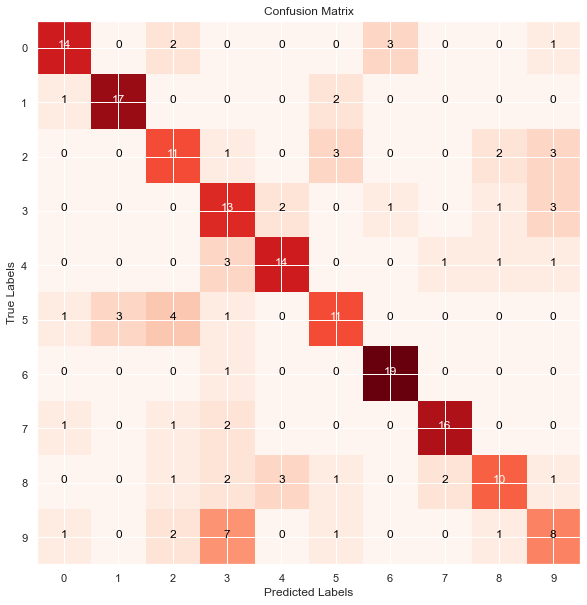

In [21]:
# Confusion Matrix
import itertools
cnf_matrix = metrics.confusion_matrix(y_test, test_pred_class)

classes = range(0,10)
print(cnf_matrix)
plt.figure(figsize=(10,10))

plt.imshow(cnf_matrix, interpolation='nearest',cmap='Reds')
plt.title("Confusion Matrix")
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
             horizontalalignment="center",
             color="white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black")

plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Convolutional Neural Network

In [22]:
# Checking the minimum and maximum values of X_train and X_test
print("The mininum of X_train is",X_train.min(),".")
print("The minimum of X_test is",X_test.min(),".")
print("The maximum of X_train is",X_train.max(),".")
print("The maximum of X_test is",X_test.max(),".")

The mininum of X_train is -4.972818914745953 .
The minimum of X_test is -4.421454239305414 .
The maximum of X_train is 4.501190051812428 .
The maximum of X_test is 3.2829396366006933 .


In [23]:
# Scale the X_test and X_train to be between 0 and 1 using the minimum value from above
for values in X_train:
  for i in range(len(values)):
    if values[i] < 0:
      values[i] = values[i]/(-5)
    if values[i] > 0:
      values[i] = values[i]/5

In [24]:
# Reshape X_train and X_test for the model
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [25]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Building of the model
model_cnn = tf.keras.Sequential()

# Building of the different dense layers and Adding to the model

model_cnn.add(Conv1D(filters = 1024,
                kernel_size = 3,
                input_shape = (X_train.shape[1],1),
                padding="same",
                activation = 'relu'))

model_cnn.add(MaxPooling1D(pool_size = 2))

model_cnn.add(Conv1D(filters = 512,
                kernel_size = 3,
                padding="same",
                activation = 'relu'))

model_cnn.add(MaxPooling1D(pool_size = 2))

model_cnn.add(Conv1D(filters = 256,
                kernel_size = 3,
                padding="same",
                activation = 'relu'))

model_cnn.add(MaxPooling1D(pool_size = 2))

model_cnn.add(Conv1D(filters = 128,
                kernel_size = 3,
                padding="same",
                activation = 'relu'))

model_cnn.add(MaxPooling1D(pool_size = 2))

model_cnn.add(Conv1D(filters = 64,
                kernel_size = 3,
                padding="same",
                activation = 'relu'))

model_cnn.add(Flatten())

model_cnn.add(Dense(units = 10, activation = 'softmax'))

In [26]:
# Compiling the model 
model_cnn.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [27]:
# Fitting the model
model_cnn.fit(X_train, y_train,
          epochs = 30,
          batch_size = 32)

Epoch 1/30
25/25 [==============================] - 8s 235ms/step - loss: 2.3001 - accuracy: 0.1178
Epoch 2/30
25/25 [==============================] - 6s 234ms/step - loss: 2.2190 - accuracy: 0.1845
Epoch 3/30
25/25 [==============================] - 6s 223ms/step - loss: 1.9058 - accuracy: 0.3104
Epoch 4/30
25/25 [==============================] - 6s 252ms/step - loss: 1.7082 - accuracy: 0.3471
Epoch 5/30
25/25 [==============================] - 6s 248ms/step - loss: 1.6325 - accuracy: 0.4040
Epoch 6/30
25/25 [==============================] - 6s 248ms/step - loss: 1.5135 - accuracy: 0.4875
Epoch 7/30
25/25 [==============================] - 7s 270ms/step - loss: 1.4735 - accuracy: 0.4372
Epoch 8/30
25/25 [==============================] - 6s 231ms/step - loss: 1.3247 - accuracy: 0.5094
Epoch 9/30
25/25 [==============================] - 6s 240ms/step - loss: 1.2884 - accuracy: 0.5328
Epoch 10/30
25/25 [==============================] - 6s 230ms/step - loss: 1.1996 - accuracy: 0.5738

In [28]:
# Calculating the accuracy
test_loss, test_acc = model_cnn.evaluate(X_test, y_test)
print("The test accuracy is :",test_acc,".")

7/7 [==============================] - 0s 27ms/step - loss: 20.2079 - accuracy: 0.4100
The test accuracy is : 0.4099999964237213 .


In [29]:
# Predictions
from sklearn import metrics

y_pred = model_cnn.predict(X_test)
test_pred_class = y_pred.argmax(axis = 1)

print(metrics.classification_report(y_test, test_pred_class))

              precision    recall  f1-score   support

           0       0.86      0.30      0.44        20
           1       0.88      0.35      0.50        20
           2       0.18      0.10      0.13        20
           3       0.29      0.55      0.38        20
           4       0.69      0.55      0.61        20
           5       0.16      0.35      0.22        20
           6       0.64      0.80      0.71        20
           7       0.77      0.50      0.61        20
           8       0.50      0.40      0.44        20
           9       0.17      0.20      0.19        20

    accuracy                           0.41       200
   macro avg       0.51      0.41      0.42       200
weighted avg       0.51      0.41      0.42       200



[[ 6  0  0  0  1  5  3  0  0  5]
 [ 0  7  4  0  0  4  0  0  4  1]
 [ 0  0  2  0  0 12  1  1  1  3]
 [ 0  0  0 11  0  3  2  0  0  4]
 [ 0  0  0  7 11  0  0  0  1  1]
 [ 0  1  4  5  0  7  0  0  2  1]
 [ 1  0  0  1  0  0 16  0  0  2]
 [ 0  0  0  4  1  4  0 10  0  1]
 [ 0  0  1  5  2  2  0  1  8  1]
 [ 0  0  0  5  1  6  3  1  0  4]]


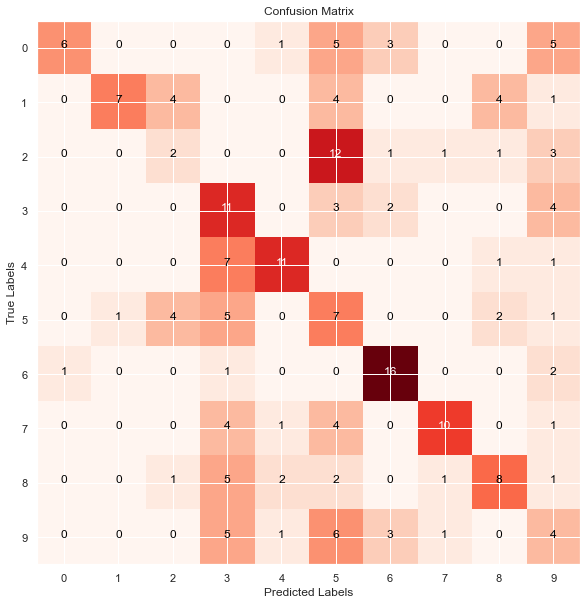

In [30]:
# Confusion Matrix
import itertools
cnf_matrix = metrics.confusion_matrix(y_test, test_pred_class)

classes = range(0,10)
print(cnf_matrix)
plt.figure(figsize=(10,10))

plt.imshow(cnf_matrix, interpolation='nearest',cmap='Reds')
plt.title("Confusion Matrix")
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
             horizontalalignment="center",
             color="white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black")

plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()